# Análisis del comportamiento de los anuncios de Meta Ads de la Constructora Xiudad

In [1]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

## CONTEXTO

El dataset utilizado en este análisis proviene del portafolio de Meta Ads, donde se recopilan los registros de campañas digitales desarrolladas para el proyecto inmobiliario **YOY XPLORA**, lanzado en mayo de 2024 por la constructora.  

Este proyecto tiene como objetivo la comercialización de 640 lotes residenciales ubicados en Jamundí, y las campañas digitales representan la principal fuente de generación de clientes potenciales (leads).

El propósito del análisis es **evaluar el comportamiento de los datos de las campates**, con especial énfasis en la variable **"Resultados"**, la cual refleja el estado alcanzado por cada interacción (por ejemplo, lead generado, conversión a cliente, compra efectiva).eting**.

## DESCRIPCIÓN DE CAMPOS
0. Nombre de la campaña: Nombre asignado a la campaña en Meta , (Tipo de variable = Categórica )
1. Identificador de la campaña: ID único de la campaña, (Tipo de variable = Númerica)
2. Nombre del conjunto de anuncios: Nombre asignado al conjunto de anuncios de la campaña en Meta Ads, (Tipo de variable = Categórica)
3. Identificador del conjunto de anuncios: ID único del conjunto de anuncios, (Tipo de variable = Númerica)
4. Nombre del anuncio: Nombre asignado al anuncio en el conjunto de anuncios en Meta Ads, (Tipo de variable = Categórica)
5. Identificador del anuncio: ID único del anuncio, (Tipo de variable = Númerica)
6. Mes: Período de duración del conjunto de anuncios/anuncio, (Tipo de variable = Categórica)
7. Objetivo: Objetivo de la campaña (ventas, clientes potenciales, mensajes, etc), (Tipo de variable = Categórica)
8. Edad: Rango de edades con las cuales se segmentó el conjunto de anuncios, (Tipo de variable = Categórica)
9. Sexo: Segmento de género para cada conjunto de anuncios, (Tipo de variable = Categórica)
10. Llamada a la acción: Botón usado para motivar al usuario a realizar una acción, (Tipo de variable = Categórica)
11. Tipo de resultado: Tipo de conversión medida, (Tipo de variable = Categórica)
12. Resultados: Cantidad de conversiones logradas, (Tipo de variable = Númerica)
13. Importe gastado (COP): Monto invertido en campaña/conjunto de anuncios/anuncios, (Tipo de variable = Númerica)
14. Alcance: Personas únicas alcanzadas, (Tipo de variable = Númerica)
15. Impresiones: Número total de veces que se mostró un anuncio, (Tipo de variable = Númerica)
16. Costo por resultado: Costo promedio por conversión, (Tipo de variable = Númerica)
17. Clics en el enlace: Número de clic en el anuncio, (Tipo de variable = Númerica)
18. CPC (costo por clic en el enlace):Costo promedio por clic, (Tipo de variable = Númerica)
19. CPM (costo por mil impresiones): Costo promedio por mil impresiones, (Tipo de variable = Númerica)
20. CTR (todos): Porcentaje de clics sobre impresiones, (Tipo de variable = Númerica)
21. Conversaciones con mensajes iniciadas: Conversaciones de Whatsapp iniciadas, (Tipo de variable = Númerica)
22. Frecuencia: Promedio de veces que una persona vio el anuncio, (Tipo de variable = Númerica)
23. Inicio del informe: Fecha inicial del reporte, (Tipo de variable = Categórica)
24. Fin del informe: Fecha final del reporte, (Tipo de variable = Categórica)

## Análisis inicial del Dataset
Empezaremos viendo cómo está estructurado el dataset

In [3]:
df_meta = pd.read_csv('REPORTE-XPLORA-MAYO-2024-AGOSTO-2025.csv')
pd.set_option('display.max_columns', None)
df_meta.shape

(2220, 25)

In [4]:
df_meta.head()

,Nombre de la campaña,Identificador de la campaña,Nombre del conjunto de anuncios,Identificador del conjunto de anuncios,Nombre del anuncio,Identificador del anuncio,Mes,Objetivo,Edad,Sexo,Llamada a la acción,Tipo de resultado,Resultados,Importe gastado (COP),Alcance,Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos),Conversaciones con mensajes iniciadas,Frecuencia,Inicio del informe,Fin del informe
0,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,55-64,male,WHATSAPP_MESSAGE,NaN,NaN,26,NaN,6,NaN,NaN,NaN,4333.333333,0.000000,NaN,NaN,2024-05-03,2024-05-31
1,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-06-01 - 2024-06-30,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,9581,NaN,794,NaN,5.0,1916.2,12066.750630,1.763224,NaN,NaN,2024-06-01,2024-06-30
2,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,25-34,male,WHATSAPP_MESSAGE,NaN,NaN,935,NaN,86,NaN,1.0,935.0,10872.093023,1.162791,NaN,NaN,2024-05-03,2024-05-31
3,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,983,NaN,71,NaN,2.0,491.5,13845.070423,5.633803,NaN,NaN,2024-05-03,2024-05-31
4,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,45-54,male,WHATSAPP_MESSAGE,NaN,NaN,866,NaN,42,NaN,2.0,433.0,20619.047619,7.142857,NaN,NaN,2024-05-03,2024-05-31


## Información básica de cada columna
Se observa información básica sobre cada columna como índice, nombre, cantidad de no nulos, tipo de dato

In [5]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nombre de la campaña                    2220 non-null   object 
 1   Identificador de la campaña             2220 non-null   int64  
 2   Nombre del conjunto de anuncios         2220 non-null   object 
 3   Identificador del conjunto de anuncios  2220 non-null   int64  
 4   Nombre del anuncio                      2220 non-null   object 
 5   Identificador del anuncio               2220 non-null   int64  
 6   Mes                                     2220 non-null   object 
 7   Objetivo                                2220 non-null   object 
 8   Edad                                    2220 non-null   object 
 9   Sexo                                    2220 non-null   object 
 10  Llamada a la acción                     2220 non-null   obje

Observamos algunas columnas que no tienen datos como Alcance, Conversaciones con mensajes iniciadas, Frecuencia
- La variable "Alcance" aparece vacía porque el alcance es justamente el "Resultado" cuando el objetivo de la campaña es de reconocimiento, por ende, esta columna se vuelve rendundante.
- La variable "Conversaciones con mensajes iniciadas" no tiene datos porque dentro de los registros no existe ninguno con objetivo de campaña de mensajes.
- La variable "Frecuencia" no tiene datos porque para calcularse esta, debe tener datos en la columna de Alcance, puesto que frecuencia se calcula como Impresiones/Alcance.

## Análisis estadístico inicial del dataset

In [6]:
df_meta.describe()

,Identificador de la campaña,Identificador del conjunto de anuncios,Identificador del anuncio,Resultados,Importe gastado (COP),Alcance,Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos),Conversaciones con mensajes iniciadas,Frecuencia
count,2.220000e+03,2.220000e+03,2.220000e+03,945.000000,2.220000e+03,0.0,2220.000000,945.000000,1610.000000,1610.000000,2.218000e+03,2218.000000,0.0,0.0
mean,1.202129e+17,1.202129e+17,1.202130e+17,3132.437037,5.321890e+04,NaN,8427.134234,8611.179909,87.513043,1250.976298,1.319606e+04,2.479121,NaN,NaN
std,2.850898e+12,2.844071e+12,2.869186e+12,10872.437242,1.384968e+05,NaN,22194.363144,10953.707613,278.117998,1191.727800,5.142396e+04,6.280554,NaN,NaN
min,1.202089e+17,1.202090e+17,1.202091e+17,1.000000,0.000000e+00,NaN,0.000000,0.000000,1.000000,11.000000,0.000000e+00,0.000000,NaN,NaN
25%,1.202108e+17,1.202108e+17,1.202108e+17,2.000000,5.457500e+02,NaN,60.000000,1267.500000,4.000000,550.141129,5.817939e+03,0.152860,NaN,NaN
50%,1.202128e+17,1.202128e+17,1.202130e+17,10.000000,6.385000e+03,NaN,593.500000,6134.000000,17.000000,1003.891304,9.466273e+03,1.479588,NaN,NaN
75%,1.202147e+17,1.202147e+17,1.202147e+17,81.000000,3.339200e+04,NaN,5261.000000,10896.666667,57.000000,1558.076230,1.446128e+04,2.990636,NaN,NaN
max,1.202253e+17,1.202253e+17,1.202253e+17,153713.000000,1.775294e+06,NaN,260652.000000,104150.000000,6729.000000,17947.000000,2.243375e+06,200.000000,NaN,NaN


Del análisis estadístico inicial (`df.describe()`) se observa que:

- Algunas columnas como los **identificadores de campaña, conjunto de anuncios e identificador del anuncio** aparecen en el resumen estadístico, pero no son variables útiles para el análisis exploratorio, ya que funcionan únicamente como llaves de identificación y no aportan información relevante desde el punto de vista descriptivo.  

- En las variables numéricas que sí aportan (ejemplo: `Resultados`, `Importe gastado (COP)`, `Impresiones`, `Clics en el enlace`, `CPC`, `CPM`, `CTR`), se evidencian **grandes diferencias entre los valores mínimos y máximos**, así como desviaciones estándar elevadas en relación con la media.  
  Esto indica que el dataset tiene **alta dispersión** y posiblemente **outliers**, lo cual será analizado más adelante.  

- Por ejemplo:  
  - `Resultados` varía entre 1 y 153.713.  
  - `Importe gastado` va desde 0 hasta más de 1,7 millones COP.  
  - `Impresiones` oscilan desde 0 hasta más de 260.000.  
  Estos rangos tan amplios sugieren comportamientos muy heterogéneos entre las distintas campañas.

Es importante resaltar que la gran variabilidad observada en las columnas numéricas se debe a que en este resumen estadístico se están incluyendo anuncios de **todos los objetivos de campaña**. Por ejemplo, en las campañas de Reconocimiento el objetivo es maximizar el alcance, por lo cual los resultados son naturalmente mucho más altos en comparación con campañas de generación de clientes potenciales, donde los números tienden a ser menores.  

Adicionalmente, muchos anuncios presentan valores bajos en la variable `Resultados` (1, 2, etc.), lo cual está relacionado con la dinámica de ejecución de campañas: se lanzan múltiples anuncios en fase de prueba y, tras un periodo de aprendizaje, solo permanecen activos aquellos que generan un desempeño favorable. Los anuncios con resultados insuficientes y costos por lead elevados suelen apagarse rápidamente, quedando registrados en el dataset con métricas bajas.  

Esto explica tanto la presencia de valores muy altos como de valores muy bajos en las diferentes métricas, y confirma que la dispersión en los datos no solo refleja outliers, sino también el comportamiento real y esperado de las campañas digitales.


### Se revisan los datos nulos por columna

In [7]:
df_meta.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                         1275
Resultados                                1275
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                         610
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversacione

Se puede observar que en la variable resultados hay muchos valores nulos, esto es debido a lo que se explicaba anteriormente con la dinámica de las campañas; sin embargo, meta al no obtener resultados de los anuncios deja el valor vacío, por esta misma razón lo que haremos será imputar el valor cero (0) a todos los valores nulos de la columna Resultados. De la misma manera, si los resultados son cero, el costo por resultado será cero.

Por otro lado, para la columna Tipo de resultados tenemos valores nulos porque Meta al detectar valores nulos, no tiene ningún objetivo que poner, sin embargo, estos valores nulos se pueden arreglar sencillamente, viendo cuál es el objetivo de la campaña del anuncio y así mismo poner un tipo de resultado.

In [8]:
df_meta.groupby('Objetivo')['Tipo de resultado'].value_counts(dropna = False)

Objetivo            Tipo de resultado           
LINK_CLICKS         Clics en el enlace               38
                    NaN                               4
OUTCOME_AWARENESS   Alcance                         194
                    NaN                              22
OUTCOME_ENGAGEMENT  NaN                             253
OUTCOME_LEADS       Clientes potenciales de Meta    713
                    NaN                             614
OUTCOME_SALES       NaN                             382
Name: count, dtype: int64

In [9]:
df_meta.loc[:,'Resultados'] = df_meta['Resultados'].fillna(0)
df_meta.loc[:,'Costo por resultado'] = df_meta['Costo por resultado'].fillna(0)
df_meta.loc[:,'Clics en el enlace'] = df_meta['Clics en el enlace'].fillna(0)

df_meta['Tipo de resultado'] = np.where(
    (df_meta['Objetivo'] == 'LINK_CLICKS') & (df_meta['Tipo de resultado'].isna()),
    'Clics en el enlace',
    np.where(
        (df_meta['Objetivo'] == 'OUTCOME_AWARENESS') & (df_meta['Tipo de resultado'].isna()),
        'Alcance',
        np.where(
            (df_meta['Objetivo'] == 'OUTCOME_LEADS') & (df_meta['Tipo de resultado'].isna()),
            'Clientes potenciales de Meta',
            np.where(
                (df_meta['Objetivo'] == 'OUTCOME_ENGAGEMENT') & (df_meta['Tipo de resultado'].isna()),
                'Interacciones',
                 np.where(
                     (df_meta['Objetivo'] == 'OUTCOME_SALES') & (df_meta['Tipo de resultado'].isna()),
                'Ventas',
                df_meta['Tipo de resultado']
                )
            ) 
        )
    )
)

In [10]:
df_meta.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                            0
Resultados                                   0
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                          0
Clics en el enlace                           0
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversacione

## Filtro por objetivo de campaña

Primero revisar los valores que tiene la columna de Objetivo

In [11]:
df_meta['Objetivo'].unique()

array(['OUTCOME_ENGAGEMENT', 'OUTCOME_LEADS', 'OUTCOME_SALES',
       'OUTCOME_AWARENESS', 'LINK_CLICKS'], dtype=object)

In [12]:
df_meta['Objetivo'].value_counts()

Objetivo
OUTCOME_LEADS         1327
OUTCOME_SALES          382
OUTCOME_ENGAGEMENT     253
OUTCOME_AWARENESS      216
LINK_CLICKS             42
Name: count, dtype: int64

Una vez identificados estos valores, se generan los datasets filtrados, pero primero vamos a eliminar las 3 columnas que no tienen datos

In [13]:
df_meta = df_meta.drop(columns=['Alcance', 'Conversaciones con mensajes iniciadas','Frecuencia'], errors = 'ignore')

Creamos un dataset filtrado por objetivo de campaña y los guardamos en un diccionario para poder facilitar la creación de gráficas

In [14]:
df_interaccion = df_meta[df_meta['Objetivo'] == 'OUTCOME_ENGAGEMENT']
df_leads = df_meta[df_meta['Objetivo'] == 'OUTCOME_LEADS']
df_ventas = df_meta[df_meta['Objetivo'] == 'OUTCOME_SALES']
df_reconocimiento = df_meta[df_meta['Objetivo'] == 'OUTCOME_AWARENESS']
df_clics = df_meta[df_meta['Objetivo'] == 'LINK_CLICKS']
dfs = {
    'Interaccion': df_interaccion,
    'Clientes potenciales': df_leads,
    'Ventas': df_ventas,
    'Reconocimiento': df_reconocimiento,
    'Clics en enlace': df_clics
}

Creamos el histograma de la variable 'Resultados' para cada dataset filtrado

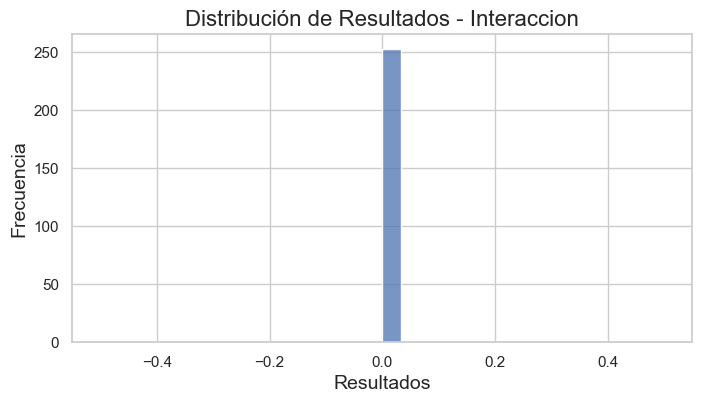

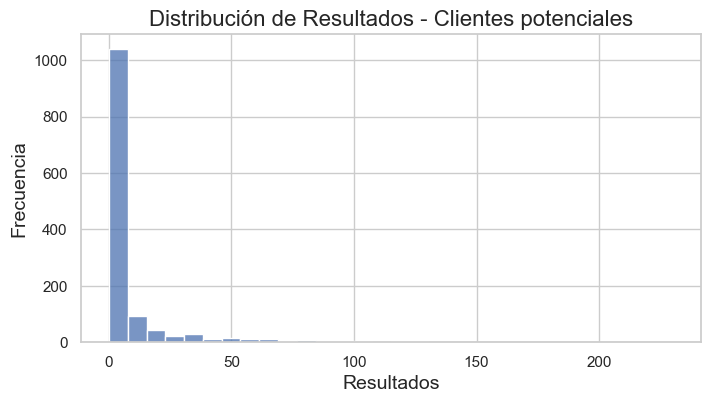

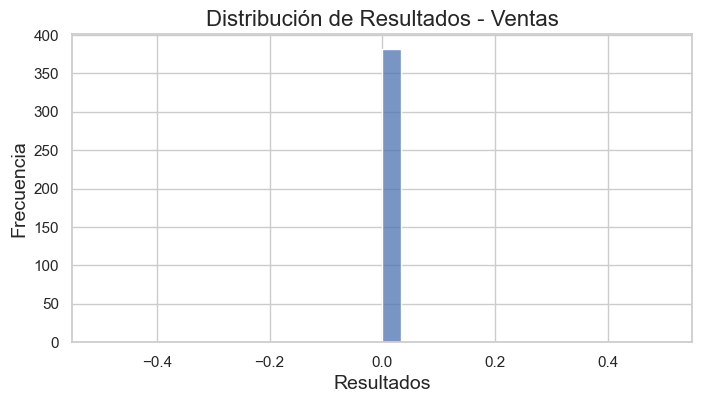

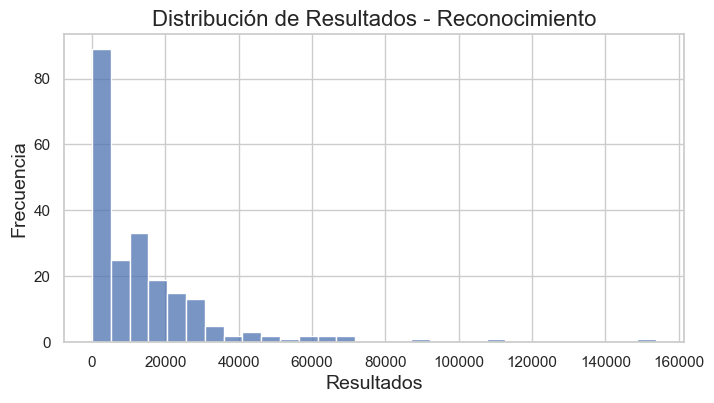

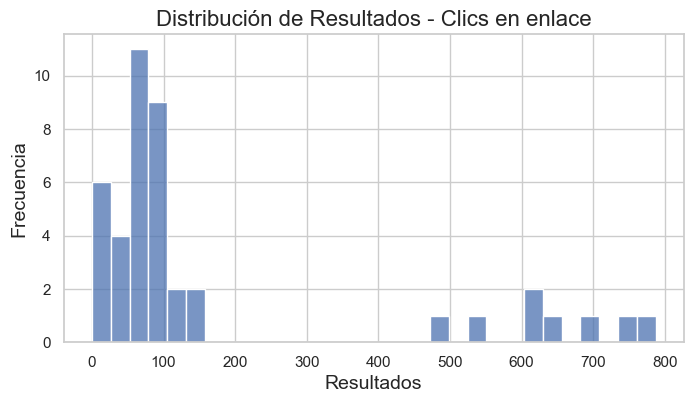

In [15]:
for objetivo, df in dfs.items():
    plt.figure(figsize=(8,4))
    sns.histplot(df['Resultados'], bins=30, kde=False)
    plt.title(f"Distribución de Resultados - {objetivo}")
    plt.xlabel("Resultados")
    plt.ylabel("Frecuencia")
    plt.show()
    

Al analizar la variable `Resultados` segmentada por objetivo de campaña, se observan diferentes patrones de distribución:

- **Clientes potenciales (OUTCOME_LEADS):**  
  La distribución es **sesgada positivamente (a la derecha)**, con la mayoría de anuncios generando entre 0 y 10 resultados.  
  Pocos anuncios alcanzan valores altos (cola larga hasta ~200).  
  Esto refleja la dinámica de campañas de prueba: se lanzan muchos anuncios, la mayoría rinde poco, y solo unos pocos concentran la mayor parte de las conversiones.

- **Reconocimiento (OUTCOME_AWARENESS):**  
  También presenta una **distribución sesgada positivamente**, pero con una **escala mucho mayor**.  
  Algunos anuncios superan los 150.000 resultados, lo que es coherente con el hecho de que estas campañas buscan maximizar **alcance e impresiones**.  
  Existe una gran dispersión entre anuncios, lo que indica variabilidad significativa en su rendimiento.

- **Clics en enlace (LINK_CLICKS):**  
  Aunque mantiene el sesgo positivo, la forma es distinta:  
  hay una **concentración de anuncios en un rango medio (50–150 clics)**, con algunos picos aislados de 500 a 800 clics.  
  Esto sugiere un comportamiento más homogéneo que en Leads o Reconocimiento, aunque todavía aparecen outliers.

- **Interacción (OUTCOME_ENGAGEMENT) y Ventas (OUTCOME_SALES):**  
  Los histogramas aparecen vacíos, evidenciando que **no existen resultados registrados en estas métricas**.  
  Aunque se mantienen en la exploración, no aportan información útil para el análisis.

Se crea un nuevo diccionario excluyendo los objetivos de Interacción y ventas. Posteriormente se vuelven a generar

In [16]:
dfs1 = dfs = {
    'Clientes potenciales': df_leads,
    'Reconocimiento': df_reconocimiento,
    'Clics en enlace': df_clics
}

In [21]:
cols_drop = ['Identificador de la campaña', 
             'Identificador del conjunto de anuncios', 
             'Identificador del anuncio']
for objetivo, df in dfs1.items():
    df = df.drop(columns = cols_drop, errors = 'ignore')
    print(f"\n------------------ {objetivo} ------------------")
    print(df.describe())


------------------ Clientes potenciales ------------------
        Resultados  Importe gastado (COP)    Impresiones  Costo por resultado  \
count  1327.000000           1.327000e+03    1327.000000          1327.000000   
mean      9.432555           7.415280e+04    8877.845516          6001.958818   
std      24.095144           1.607091e+05   24205.043068         10103.454325   
min       0.000000           0.000000e+00       0.000000             0.000000   
25%       0.000000           8.540000e+02      59.000000             0.000000   
50%       1.000000           7.482000e+03     530.000000          1884.000000   
75%       5.000000           5.976800e+04    4813.500000          8764.500000   
max     230.000000           1.084115e+06  260652.000000        104150.000000   

       Clics en el enlace  CPC (costo por clic en el enlace)  \
count         1327.000000                         977.000000   
mean            65.969103                        1550.135008   
std            172

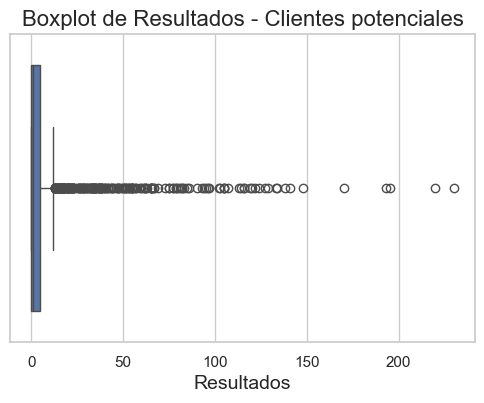

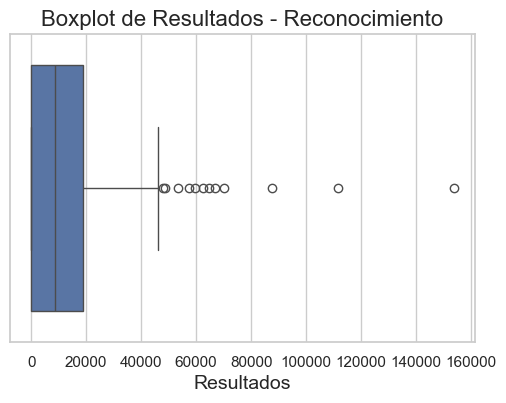

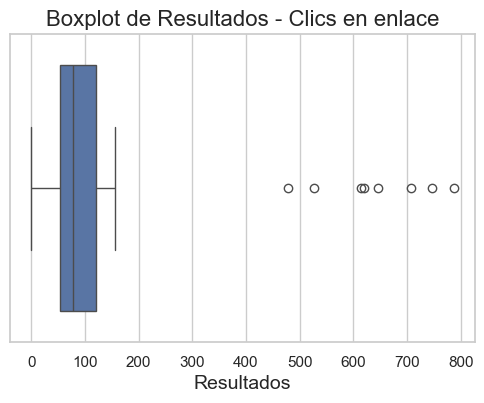

In [18]:
for objetivo, df in dfs1.items():
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['Resultados'])
    plt.title(f"Boxplot de Resultados - {objetivo}")
    plt.xlabel("Resultados")
    plt.show()

In [11]:
# Crear tabla a partir de describe()
tabla = df_meta_subset["Resultados"].describe().to_frame()
tabla = tabla.rename(columns={"Resultados": "Valor"})

# Formato más limpio: redondear y usar separador de miles
tabla["Valor"] = tabla["Valor"].apply(lambda x: f"{x:,.0f}")

# Crear figura
fig, ax = plt.subplots(figsize=(5,3))
ax.axis("tight")
ax.axis("off")

# Dibujar tabla
tabla_plot = ax.table(cellText=tabla.values,
                      rowLabels=tabla.index,
                      colLabels=tabla.columns,
                      cellLoc='center',
                      rowLoc='center',
                      loc='center')

# Ajustar estilo
tabla_plot.auto_set_font_size(False)
tabla_plot.set_fontsize(10)
tabla_plot.scale(1.2, 1.2)

plt.title("📊 Estadísticas descriptivas de Resultados", fontsize=12, fontweight="bold", pad=10)

# Guardar como imagen
plt.savefig("tabla_resultados.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

NameError: name 'df_meta_subset' is not defined

#### Las 3 primeras columnas no las podemos analizar puesto que son ID's, por otro lado, los valores de resultados pueden ser bastante variables dependiendo del objetivo de la campaña al igual que el costo por resultado puede variar bastante dependiendo de si el anuncio trae bastantes resultados

In [18]:
# Conocer cantidad de nulos por columna
df_meta.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                         1275
Resultados                                1275
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                         610
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversacione

In [19]:
#Mostrar las columnas para poder crear un data frame (df_meta_subset) donde no aparezcan las columnas que no tienen valores
#o no son relevantes
df_meta.columns

Index(['Nombre de la campaña', 'Identificador de la campaña',
       'Nombre del conjunto de anuncios',
       'Identificador del conjunto de anuncios', 'Nombre del anuncio',
       'Identificador del anuncio', 'Mes', 'Objetivo', 'Edad', 'Sexo',
       'Llamada a la acción', 'Tipo de resultado', 'Resultados',
       'Importe gastado (COP)', 'Alcance', 'Impresiones',
       'Costo por resultado', 'Clics en el enlace',
       'CPC (costo por clic en el enlace)', 'CPM (costo por mil impresiones)',
       'CTR (todos)', 'Conversaciones con mensajes iniciadas', 'Frecuencia',
       'Inicio del informe', 'Fin del informe'],
      dtype='object')

In [20]:
df_meta_subset = df_meta[['Nombre de la campaña', 'Identificador de la campaña',
       'Nombre del conjunto de anuncios',
       'Identificador del conjunto de anuncios', 'Nombre del anuncio',
       'Identificador del anuncio', 'Mes', 'Objetivo', 'Edad', 'Sexo',
       'Llamada a la acción', 'Tipo de resultado', 'Resultados',
       'Importe gastado (COP)', 'Impresiones',
       'Costo por resultado', 'Clics en el enlace',
       'CPC (costo por clic en el enlace)', 'CPM (costo por mil impresiones)',
       'CTR (todos)']]
df_meta_subset.head()

,Nombre de la campaña,Identificador de la campaña,Nombre del conjunto de anuncios,Identificador del conjunto de anuncios,Nombre del anuncio,Identificador del anuncio,Mes,Objetivo,Edad,Sexo,Llamada a la acción,Tipo de resultado,Resultados,Importe gastado (COP),Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos)
0,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,55-64,male,WHATSAPP_MESSAGE,NaN,NaN,26,6,NaN,NaN,NaN,4333.333333,0.000000
1,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-06-01 - 2024-06-30,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,9581,794,NaN,5.0,1916.2,12066.750630,1.763224
2,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,25-34,male,WHATSAPP_MESSAGE,NaN,NaN,935,86,NaN,1.0,935.0,10872.093023,1.162791
3,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,983,71,NaN,2.0,491.5,13845.070423,5.633803
4,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,45-54,male,WHATSAPP_MESSAGE,NaN,NaN,866,42,NaN,2.0,433.0,20619.047619,7.142857


In [65]:
df_meta_subset.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                         1275
Resultados                                   0
Importe gastado (COP)                        0
Impresiones                                  0
Costo por resultado                          0
Clics en el enlace                           0
CPC (costo por clic en el enlace)            0
CPM (costo por mil impresiones)              0
CTR (todos)                                  0
dtype: int64

In [22]:
df_meta_subset[df_meta_subset['Resultados'].isnull()]

,Nombre de la campaña,Identificador de la campaña,Nombre del conjunto de anuncios,Identificador del conjunto de anuncios,Nombre del anuncio,Identificador del anuncio,Mes,Objetivo,Edad,Sexo,Llamada a la acción,Tipo de resultado,Resultados,Importe gastado (COP),Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos)
0,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,55-64,male,WHATSAPP_MESSAGE,NaN,NaN,26,6,NaN,NaN,NaN,4333.333333,0.000000
1,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-06-01 - 2024-06-30,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,9581,794,NaN,5.0,1916.2,12066.750630,1.763224
2,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,25-34,male,WHATSAPP_MESSAGE,NaN,NaN,935,86,NaN,1.0,935.0,10872.093023,1.162791
3,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,983,71,NaN,2.0,491.5,13845.070423,5.633803
4,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,45-54,male,WHATSAPP_MESSAGE,NaN,NaN,866,42,NaN,2.0,433.0,20619.047619,7.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,45-54,unknown,WHATSAPP_MESSAGE,NaN,NaN,82,19,NaN,1.0,82.0,4315.789474,5.263158
2216,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,25-34,unknown,WHATSAPP_MESSAGE,NaN,NaN,193,21,NaN,NaN,NaN,9190.476190,0.000000
2217,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,55-64,unknown,WHATSAPP_MESSAGE,NaN,NaN,2,1,NaN,NaN,NaN,2000.000000,0.000000
2218,ejecutivo xplora 2025,120225312763360362,ejecutivo xplora 2025,120225312763380362,ejecutivo xplora 2025,120225312763400362,2025-05-01 - 2025-05-31,OUTCOME_SALES,35-44,unknown,WHATSAPP_MESSAGE,NaN,NaN,268,14,NaN,NaN,NaN,19142.857143,0.000000


In [23]:
df_meta_subset.loc[:, 'Resultados'] = df_meta_subset['Resultados'].fillna(0)
df_meta_subset.loc[:, 'Clics en el enlace'] = df_meta_subset['Clics en el enlace'].fillna(0)
df_meta_subset.loc[:, 'CPC (costo por clic en el enlace)'] = df_meta_subset['CPC (costo por clic en el enlace)'].fillna(0)
df_meta_subset.loc[:, 'Costo por resultado'] = df_meta_subset['Costo por resultado'].fillna(0)

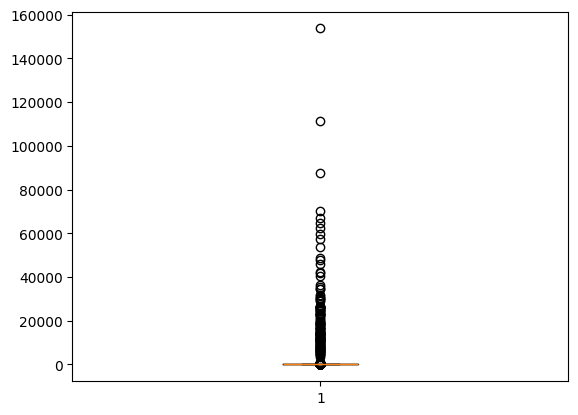

In [24]:
plt.boxplot(df_meta_subset['Resultados'])
plt.show()

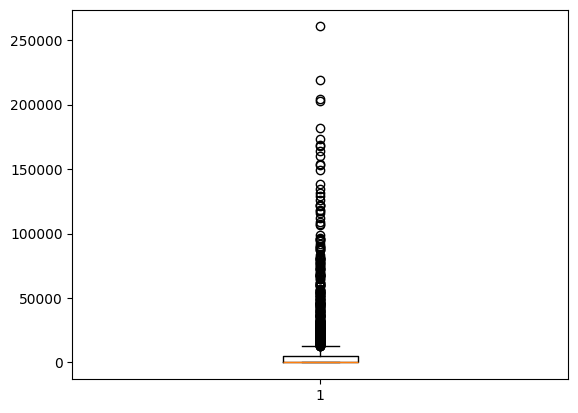

In [25]:
plt.boxplot(df_meta_subset['Impresiones'])
plt.show()

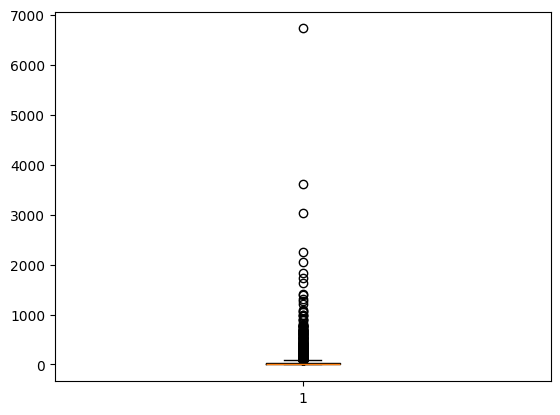

In [26]:
plt.boxplot(df_meta_subset['Clics en el enlace'])
plt.show()

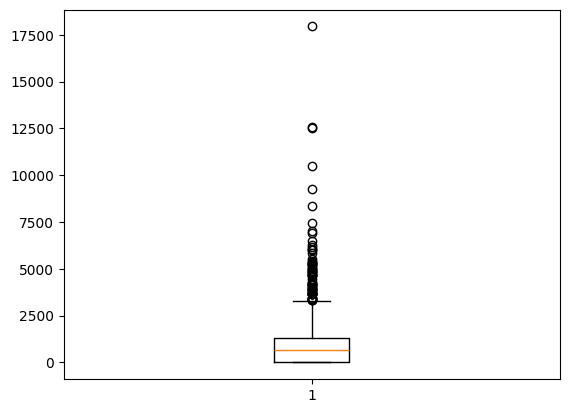

In [27]:
plt.boxplot(df_meta_subset['CPC (costo por clic en el enlace)'])
plt.show()

In [28]:
df_meta_subset = df_meta_subset.dropna(subset=['CPM (costo por mil impresiones)', 'CTR (todos)'])

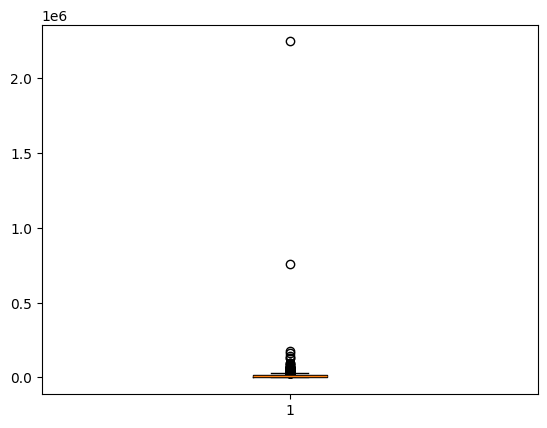

In [29]:
plt.boxplot(df_meta_subset['CPM (costo por mil impresiones)'])
plt.show()

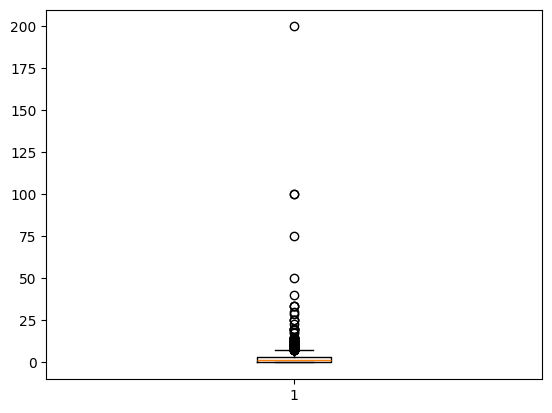

In [30]:
plt.boxplot(df_meta_subset['CTR (todos)'])
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_7596\3306633060.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


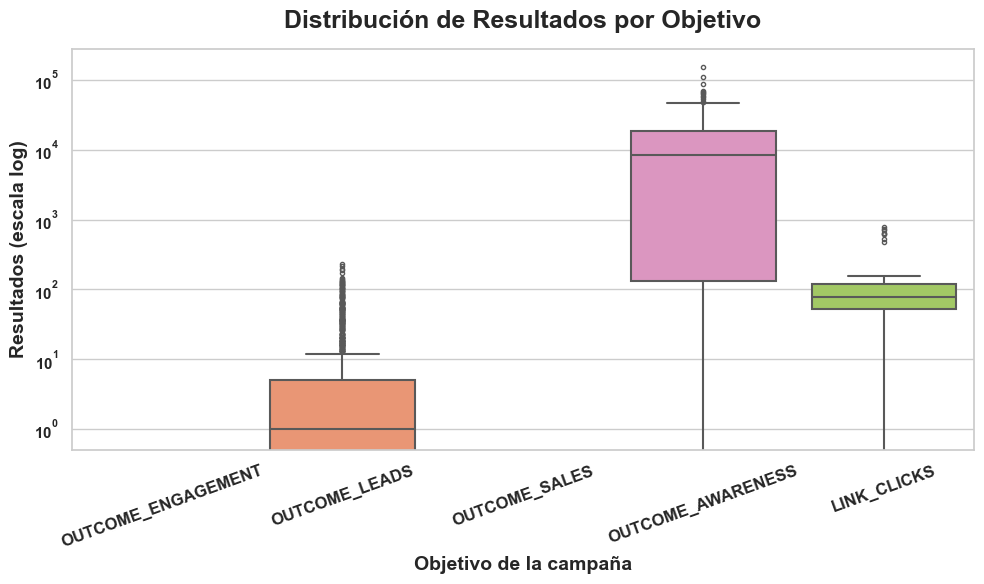

In [93]:
plt.figure(figsize=(10,6))

# Colores elegantes
palette = sns.color_palette("Set2", n_colors=df_meta_subset["Objetivo"].nunique())

# Crear boxplot
ax = sns.boxplot(
    data=df_meta_subset,
    x="Objetivo",
    y="Resultados",
    palette=palette,
    fliersize=3,
    linewidth=1.5
)

plt.yscale("log")
plt.ylim(0.5, None)

# Títulos y ejes en negrita
plt.title("Distribución de Resultados por Objetivo", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Objetivo de la campaña", fontsize=14, fontweight="bold")
plt.ylabel("Resultados (escala log)", fontsize=14, fontweight="bold")
plt.xticks(rotation=20, fontsize=12, fontweight="bold")
plt.yticks(fontsize=11, fontweight="bold")

# === Extraer valores de bigotes y anotarlos ===
for patch, obj in zip(ax.artists, df_meta_subset["Objetivo"].unique()):
    box = patch.get_path().vertices
    # ymin (whisker inferior) y ymax (whisker superior)
    ymin = ax.transData.inverted().transform(box)[0,1]
    ymax = ax.transData.inverted().transform(box)[2,1]
    
    x = patch.get_x() + patch.get_width()/2
    ax.text(x, ymin, f"{int(ymin):,}", ha="center", va="top", fontsize=9, fontweight="bold", color="black")
    ax.text(x, ymax, f"{int(ymax):,}", ha="center", va="bottom", fontsize=9, fontweight="bold", color="black")

plt.tight_layout()
plt.savefig("grafico_resultados.png", 
            dpi=300, 
            bbox_inches="tight", 
            transparent=True)
plt.show()

Text(0, 0.5, 'Cantidad de registros')

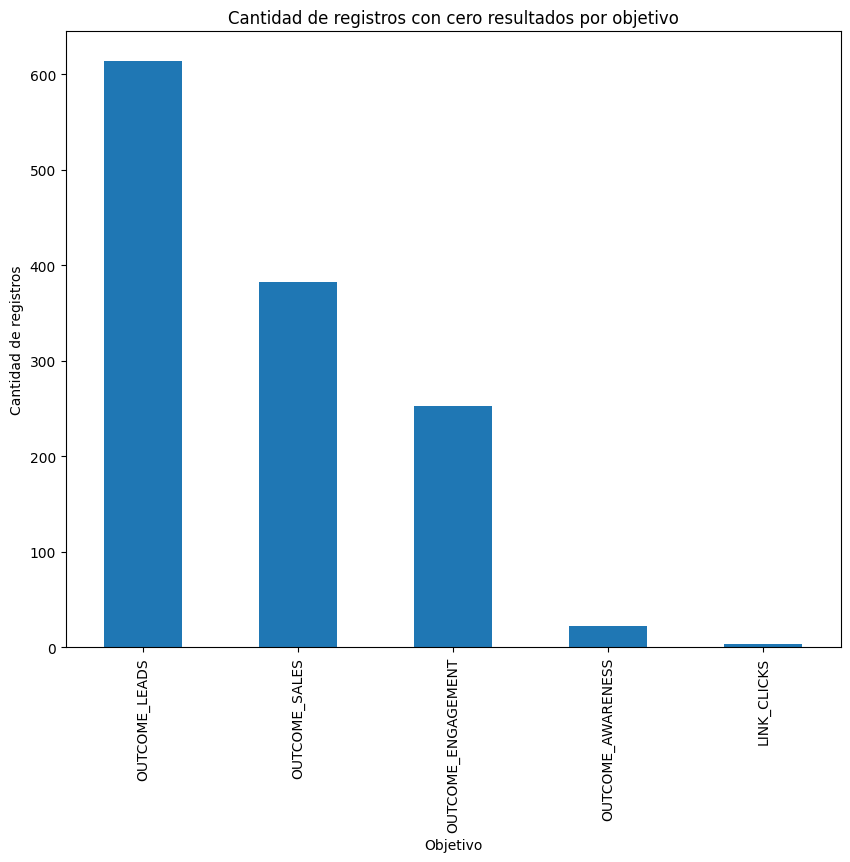

In [32]:
df_meta_subset[df_meta_subset['Resultados']==0]['Objetivo'].value_counts().plot(kind='bar',figsize=(10,8))
plt.title('Cantidad de registros con cero resultados por objetivo')
plt.xlabel('Objetivo')
plt.ylabel('Cantidad de registros')        

In [33]:
(df_meta_subset['Resultados'] == 0).mean()

np.float64(0.5748422001803426)

In [34]:
df_meta_subset.groupby("Objetivo")['Resultados'].apply(lambda x: (x==0).mean())

Objetivo
LINK_CLICKS           0.095238
OUTCOME_AWARENESS     0.101852
OUTCOME_ENGAGEMENT    1.000000
OUTCOME_LEADS         0.463396
OUTCOME_SALES         1.000000
Name: Resultados, dtype: float64

In [35]:
df_meta_filtrado=df_meta_subset.query("Objetivo not in ['OUTCOME_ENGAGEMENT', 'OUTCOME_SALES']").copy()
df_meta_filtrado['Objetivo'].unique()

array(['OUTCOME_LEADS', 'OUTCOME_AWARENESS', 'LINK_CLICKS'], dtype=object)

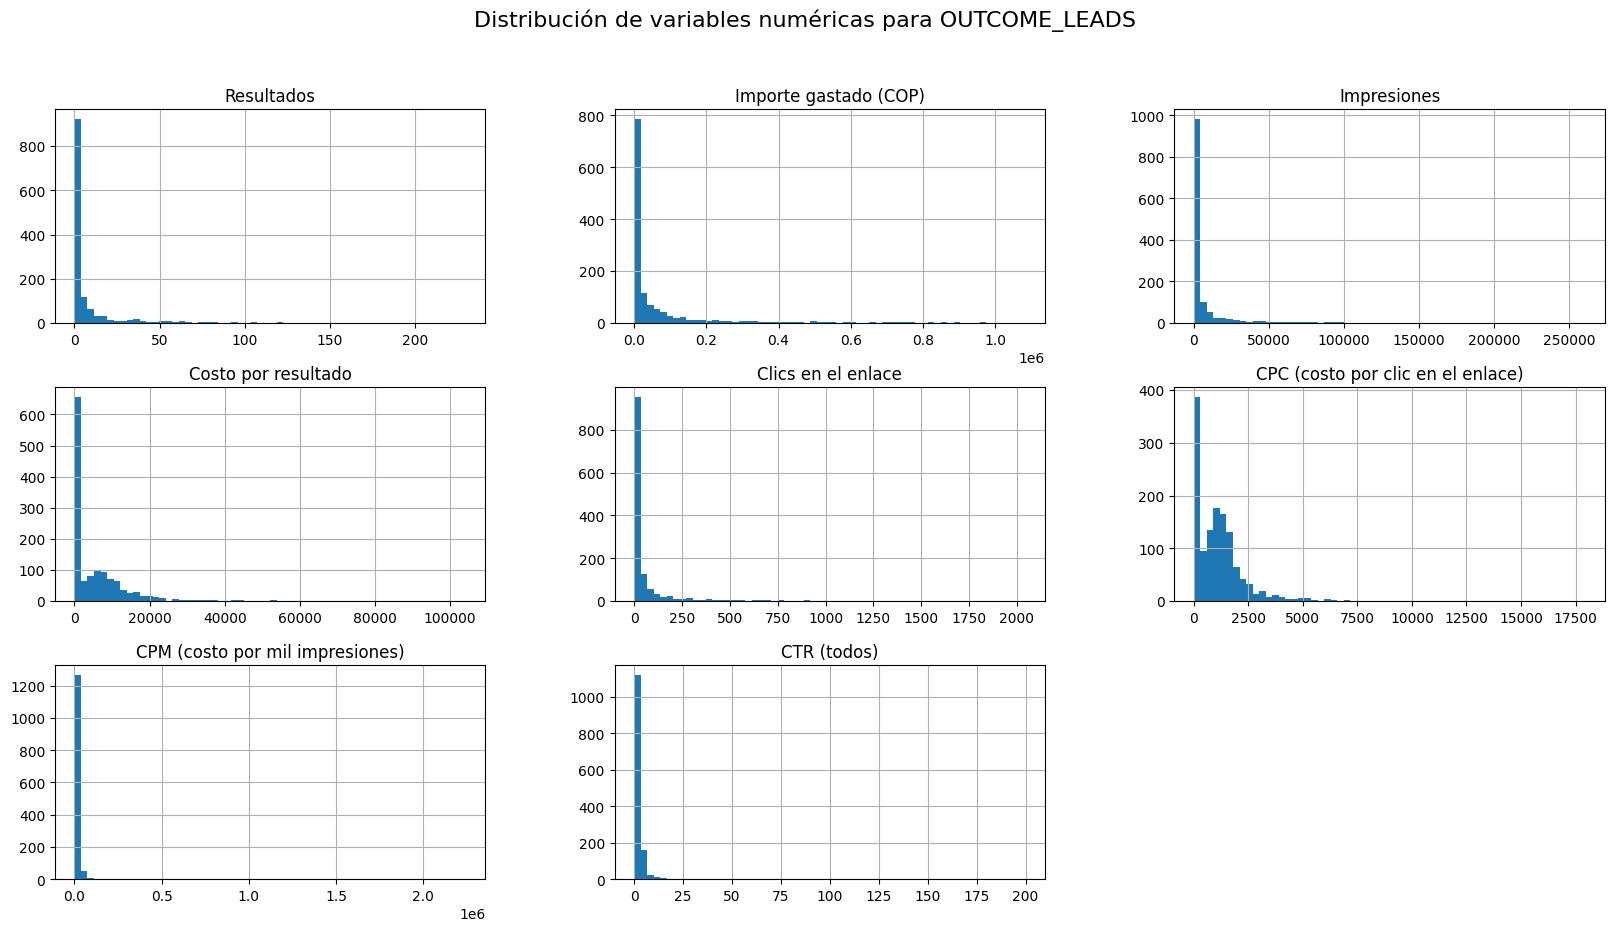

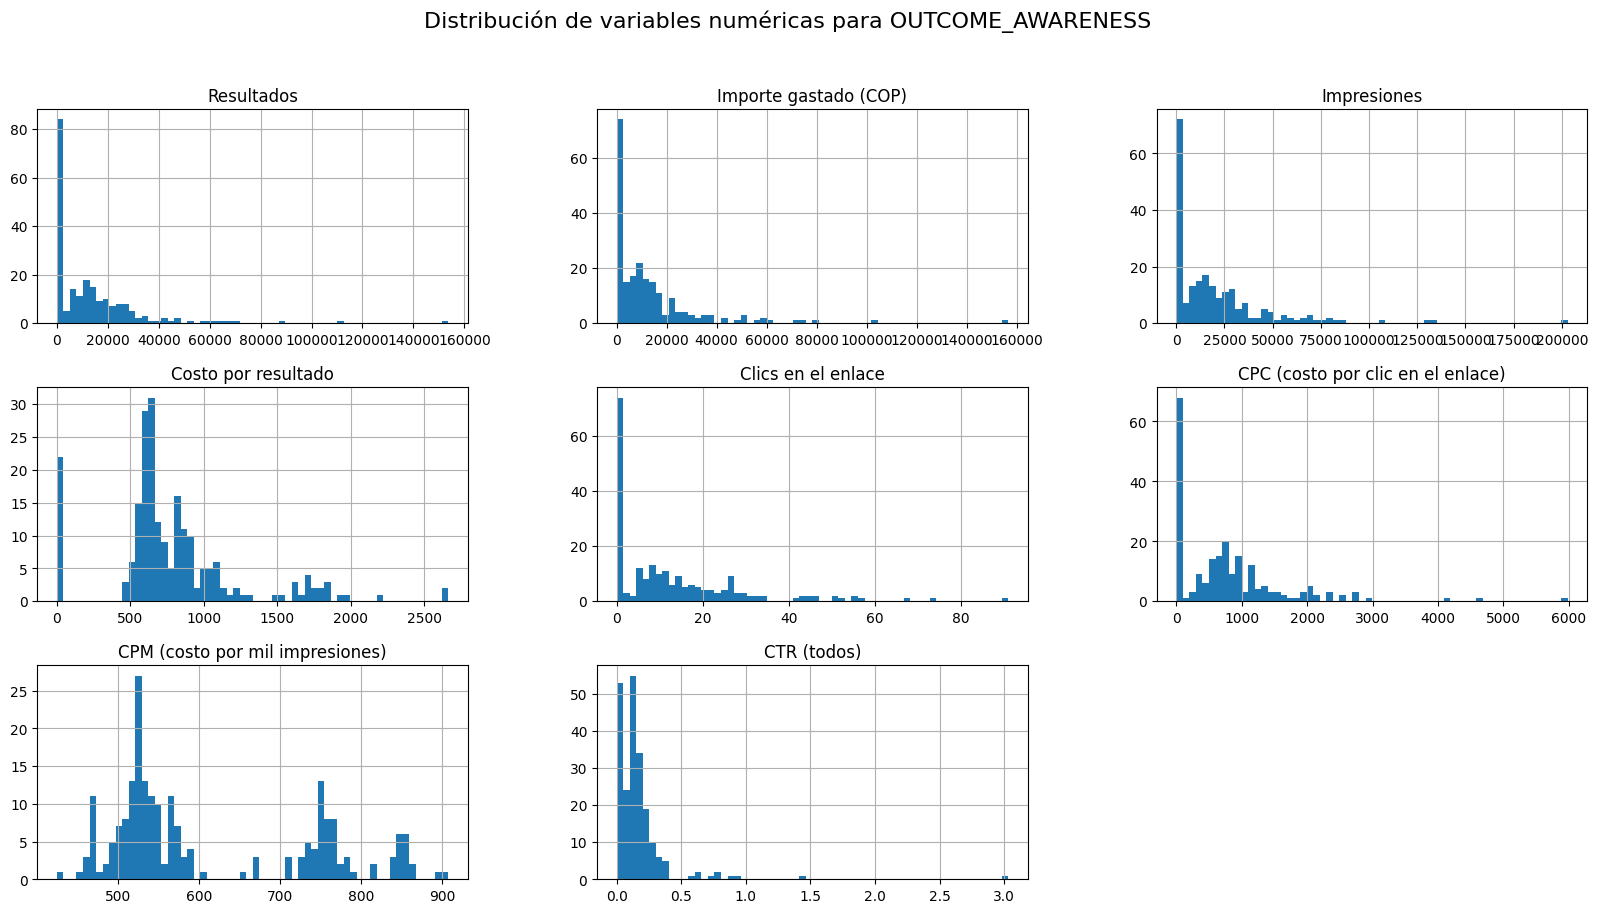

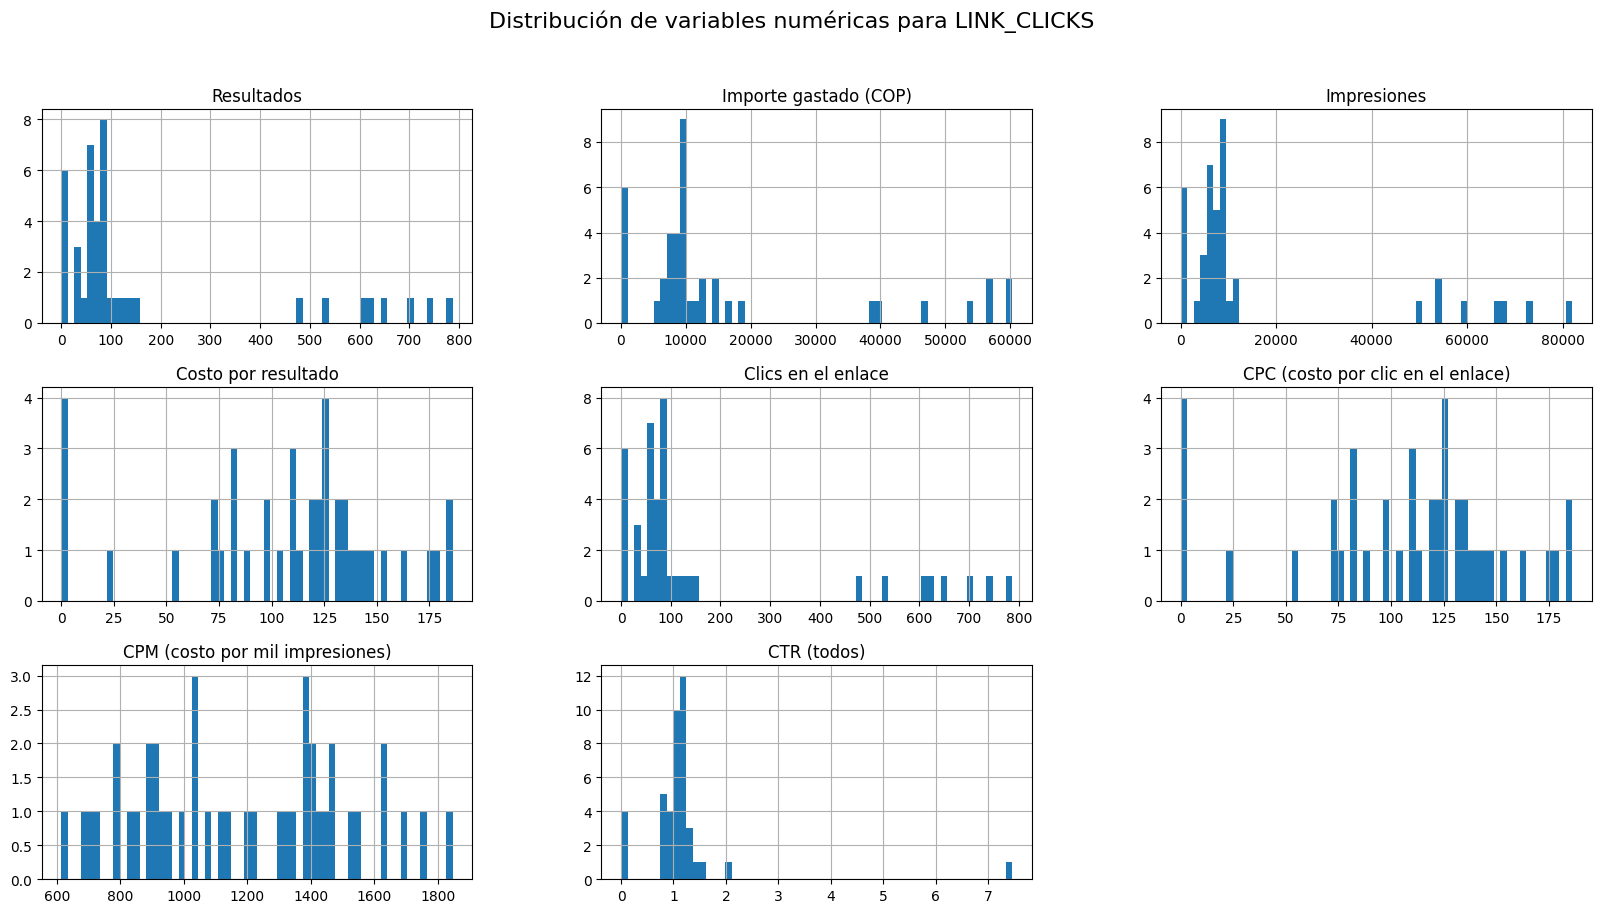

In [36]:
obj_filtrado = df_meta_filtrado['Objetivo'].unique()
cols_drop = ['Identificador de la campaña', 
             'Identificador del conjunto de anuncios', 
             'Identificador del anuncio']
for obj in obj_filtrado:
    subset = df_meta_filtrado[df_meta_filtrado['Objetivo'] == obj]
    subset = subset.drop(columns=cols_drop, errors = 'ignore')
    subset.hist(bins=60, figsize=(20,10))
    plt.suptitle(f"Distribución de variables numéricas para {obj}", fontsize=16)
    plt.show()

In [37]:
df_meta_filtrado['Mes'].sort_values().unique()

array(['2024-05-03 - 2024-05-31', '2024-06-01 - 2024-06-30',
       '2024-07-01 - 2024-07-31', '2024-08-01 - 2024-08-31',
       '2024-09-01 - 2024-09-30', '2024-10-01 - 2024-10-31',
       '2024-11-01 - 2024-11-30', '2024-12-01 - 2024-12-31',
       '2025-01-01 - 2025-01-31', '2025-02-01 - 2025-02-28',
       '2025-03-01 - 2025-03-31'], dtype=object)

In [38]:
df_meta_filtrado['Mes inicio']=df_meta_filtrado['Mes'].str.split('-').str[0]
df_meta_filtrado['Mes inicio']=pd.to_datetime(df_meta_filtrado['Mes inicio'])
df_meta_filtrado['Año']=df_meta_filtrado['Mes inicio'].dt.year
df_meta_filtrado['Mes_num']=df_meta_filtrado['Mes inicio'].dt.month

In [39]:
df_meta_filtrado.drop(columns='Mes inicio',inplace=True)

In [40]:
df_meta_filtrado['Tipo de resultado'].value_counts(dropna=False)

Tipo de resultado
Clientes potenciales de Meta    711
NaN                             640
Alcance                         194
Clics en el enlace               38
Name: count, dtype: int64

In [41]:
df_meta_filtrado.groupby('Objetivo')['Tipo de resultado'].value_counts(dropna=False)

Objetivo           Tipo de resultado           
LINK_CLICKS        Clics en el enlace               38
                   NaN                               4
OUTCOME_AWARENESS  Alcance                         194
                   NaN                              22
OUTCOME_LEADS      Clientes potenciales de Meta    711
                   NaN                             614
Name: count, dtype: int64

In [42]:
registrosna=df_meta_filtrado[(df_meta_filtrado['Tipo de resultado'].isna()
                              &(df_meta_filtrado['Objetivo'].isin(['LINK_CLICKS','OUTCOME_AWARENESS'])))]

In [65]:
df_meta_filtrado['Tipo de resultado'] = np.where(
    (df_meta_filtrado['Objetivo'] == 'LINK_CLICKS') & (df_meta_filtrado['Tipo de resultado'].isna()),
    'Clics en el enlace',
    np.where(
        (df_meta_filtrado['Objetivo'] == 'OUTCOME_AWARENESS') & (df_meta_filtrado['Tipo de resultado'].isna()),
        'Alcance',
        np.where(
            (df_meta_filtrado['Objetivo'] == 'OUTCOME_LEADS') & (df_meta_filtrado['Tipo de resultado'].isna()),
            'Clientes potenciales de Meta',
            df_meta_filtrado['Tipo de resultado'] 
        )
    )
)

NameError: name 'df_meta_filtrado' is not defined

In [44]:
df_meta_filtrado['Tipo de resultado'].isnull().sum()

np.int64(0)

In [45]:
cols_cat=['Edad','Sexo','Llamada a la acción','Tipo de resultado']
for cols in cols_cat:
    print('\n'f'Columna: {cols}')
    print(df_meta_filtrado[cols].value_counts())


Columna: Edad
Edad
45-54    324
35-44    323
25-34    320
55-64    290
65+      164
18-24    162
Name: count, dtype: int64

Columna: Sexo
Sexo
male       546
female     545
unknown    492
Name: count, dtype: int64

Columna: Llamada a la acción
Llamada a la acción
SIGN_UP             643
GET_QUOTE           560
LEARN_MORE          167
WATCH_MORE          144
CONTACT_US           22
WHATSAPP_MESSAGE     18
GET_OFFER            18
APPLY_NOW            11
Name: count, dtype: int64

Columna: Tipo de resultado
Tipo de resultado
Clientes potenciales de Meta    1325
Alcance                          216
Clics en el enlace                42
Name: count, dtype: int64


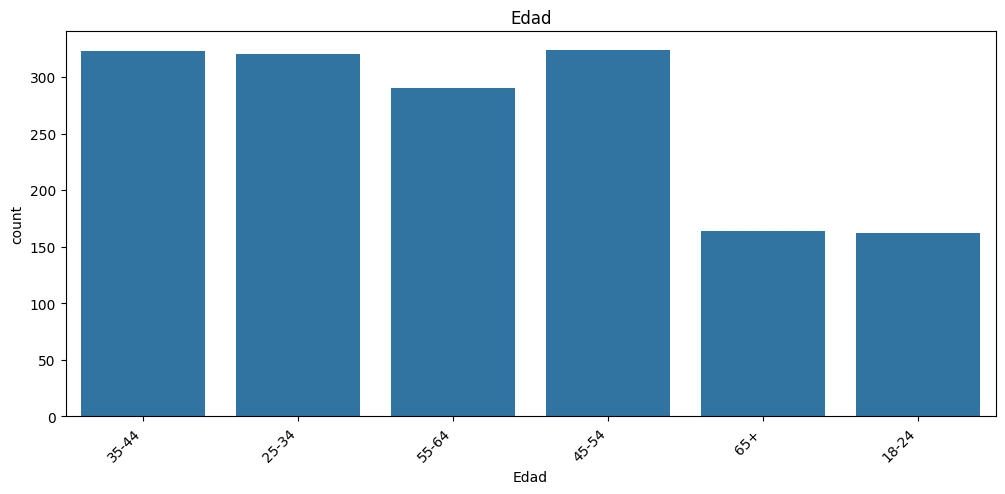

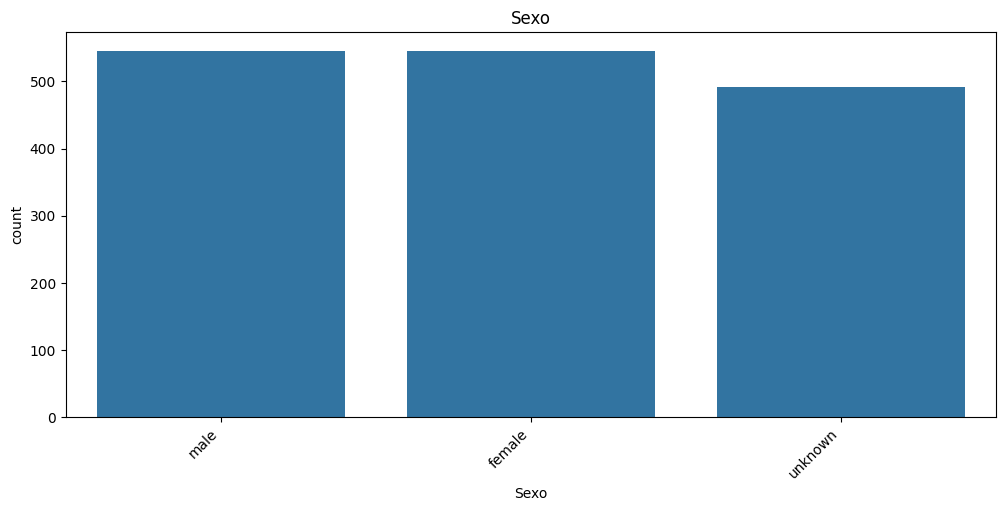

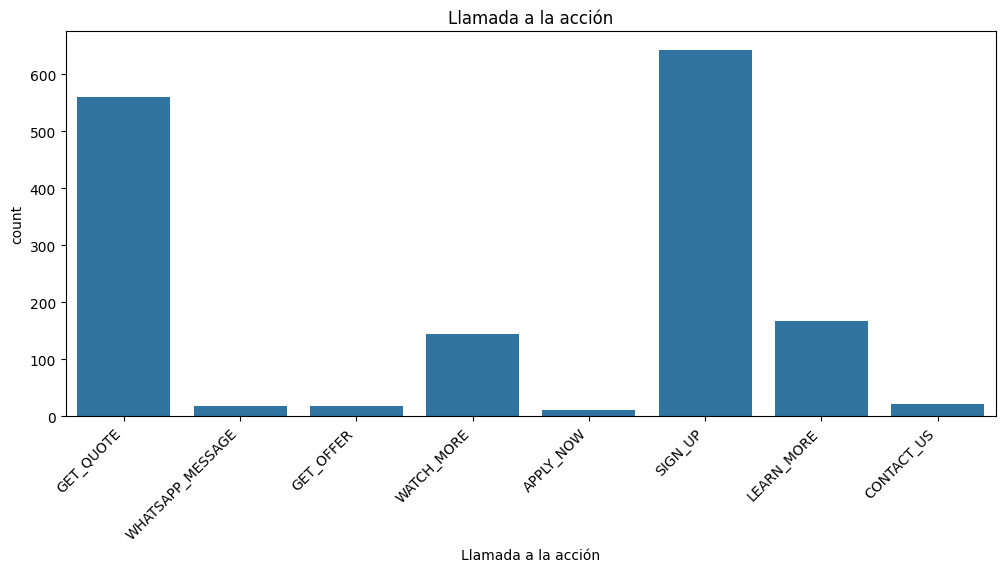

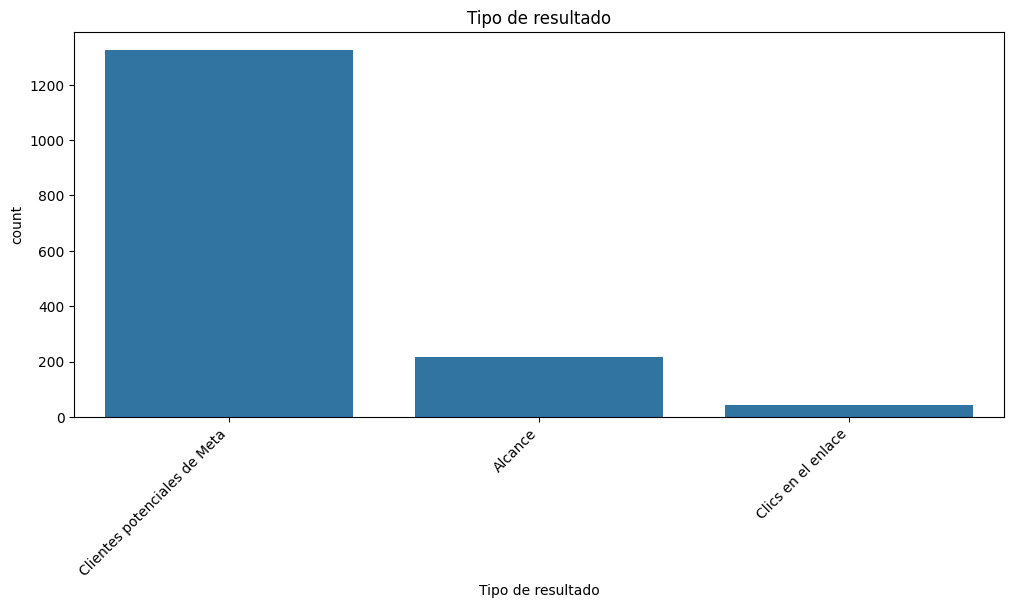

In [46]:
for cols in cols_cat:
    plt.figure(figsize=(12,5))
    sns.countplot(x=cols,data=df_meta_filtrado)
    plt.title(cols)
    plt.xticks(rotation=45,ha='right')
    plt.show()

In [47]:
df_meta_filtrado.columns

Index(['Nombre de la campaña', 'Identificador de la campaña',
       'Nombre del conjunto de anuncios',
       'Identificador del conjunto de anuncios', 'Nombre del anuncio',
       'Identificador del anuncio', 'Mes', 'Objetivo', 'Edad', 'Sexo',
       'Llamada a la acción', 'Tipo de resultado', 'Resultados',
       'Importe gastado (COP)', 'Impresiones', 'Costo por resultado',
       'Clics en el enlace', 'CPC (costo por clic en el enlace)',
       'CPM (costo por mil impresiones)', 'CTR (todos)', 'Año', 'Mes_num'],
      dtype='object')

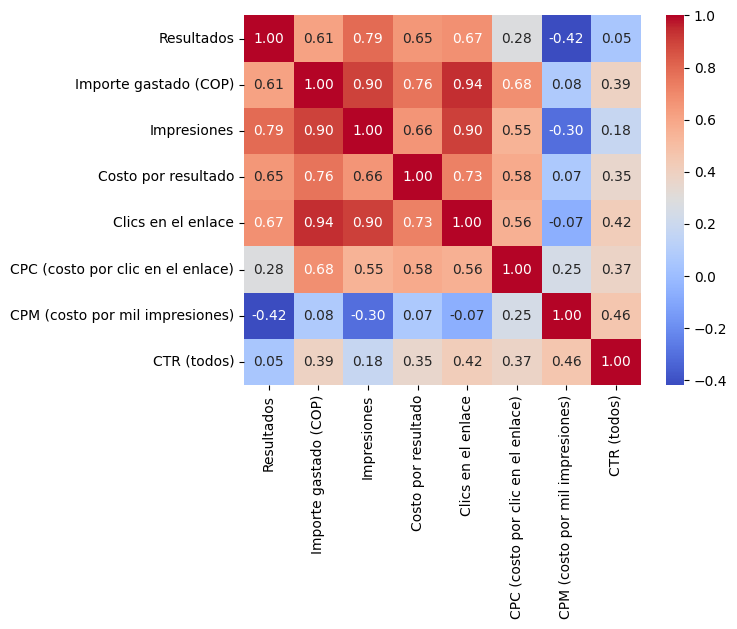

In [48]:
heatmap_list=df_meta_filtrado[['Resultados','Importe gastado (COP)','Impresiones','Costo por resultado','Clics en el enlace','CPC (costo por clic en el enlace)','CPM (costo por mil impresiones)','CTR (todos)']]
sns.heatmap(heatmap_list.corr(method='spearman'),annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [49]:
def razon_correlacion(categoria, numerica):
    categorias = pd.Categorical(categoria)
    y_avg = numerica.mean()
    ss_between = sum([len(numerica[categorias == cat]) * (numerica[categorias == cat].mean() - y_avg) ** 2 for cat in categorias.categories])
    ss_total = sum((numerica - y_avg) ** 2)
    return np.sqrt(ss_between / ss_total)

In [50]:
for cols in cols_cat:
    eta= razon_correlacion(df_meta_filtrado[cols],df_meta_filtrado['Resultados'])
    print('\n', cols)
    print("Razón de correlación: ", eta)


 Edad
Razón de correlación:  0.15890446196281435

 Sexo
Razón de correlación:  0.16242626878250024

 Llamada a la acción
Razón de correlación:  0.4989867488765569

 Tipo de resultado
Razón de correlación:  0.5468805343220676
